In [1]:
import re

import numpy as np
import pandas as pd
import os
import featuretools as ft
from shl.prepare import normalize_epoch_time, normalize_lat_long
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.parsing.preprocessing import \
    strip_tags, strip_punctuation, strip_multiple_whitespaces, strip_numeric, \
    strip_short, stem_text

from shl.features import WifiFeature

%load_ext autoreload
%autoreload 2

/Users/torinaki/www/htdocs/shl-2021/.venv/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
train_wifi = normalize_epoch_time(pd.read_parquet('../data/train/WiFi.parquet'), 'Epoch time [ms]')
test_wifi = normalize_epoch_time(pd.read_parquet('../data/test/WiFi.parquet'), 'Epoch time [ms]')
validate_wifi = normalize_epoch_time(pd.read_parquet('../data/validate/WiFi.parquet'), 'Epoch time [ms]')
train_label = normalize_epoch_time(pd.read_parquet('../data/train/Label.parquet'), 'epoch_time')
test_label = normalize_epoch_time(pd.read_parquet('../data/test/Label_idx.parquet'), 'epoch_time')
validate_label = normalize_epoch_time(pd.read_parquet('../data/validate/Label.parquet'), 'epoch_time')

In [3]:
%%time

wifi_feature = WifiFeature(train_wifi)
train_wifi_features = wifi_feature.transform(train_wifi)
validate_wifi_features = wifi_feature.transform(validate_wifi)
test_wifi_features = wifi_feature.transform(test_wifi)

CPU times: user 8min 55s, sys: 2min 24s, total: 11min 19s
Wall time: 12min 46s


In [4]:
validate_wifi_features

,wifi_0,wifi_1,wifi_2,wifi_3,wifi_4,wifi_5,wifi_6,wifi_7,wifi_8,wifi_9,...,wifi_20,wifi_21,wifi_22,wifi_23,wifi_24,wifi_25,wifi_26,wifi_27,wifi_28,wifi_29
epoch_time_id,,,,,,,,,,,,,,,,,,,,,
1497426496000,2.173321e-01,0.227253,-2.126278e-09,1.344810e-09,-1.753492e-05,7.149798e-01,-0.056716,-8.763916e-08,-9.700303e-08,-3.849569e-07,...,0.000204,0.210621,0.174410,-0.01886,0.000863,0.220231,0.002963,-0.002362,0.015392,0.004773
1497426497000,2.173321e-01,0.227253,-2.126278e-09,1.344810e-09,-1.753492e-05,7.149798e-01,-0.056716,-8.763916e-08,-9.700303e-08,-3.849569e-07,...,0.000204,0.210621,0.174410,-0.01886,0.000863,0.220231,0.002963,-0.002362,0.015392,0.004773
1497426498000,2.173321e-01,0.227253,-2.126278e-09,1.344810e-09,-1.753492e-05,7.149798e-01,-0.056716,-8.763916e-08,-9.700303e-08,-3.849569e-07,...,0.000204,0.210621,0.174410,-0.01886,0.000863,0.220231,0.002963,-0.002362,0.015392,0.004773
1497426499000,2.173321e-01,0.227253,-2.126278e-09,1.344810e-09,-1.753492e-05,7.149798e-01,-0.056716,-8.763916e-08,-9.700303e-08,-3.849569e-07,...,0.000204,0.210621,0.174410,-0.01886,0.000863,0.220231,0.002963,-0.002362,0.015392,0.004773
1497426500000,2.173321e-01,0.227253,-2.126278e-09,1.344810e-09,-1.753492e-05,7.149798e-01,-0.056716,-8.763916e-08,-9.700303e-08,-3.849569e-07,...,0.000204,0.210621,0.174410,-0.01886,0.000863,0.220231,0.002963,-0.002362,0.015392,0.004773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500390557000,3.569487e-08,0.005496,-1.927109e-09,1.292180e-09,5.000040e-08,2.014776e-08,0.000001,-1.060183e-07,-7.050767e-08,-2.728610e-07,...,0.000062,-0.000204,-0.021254,-0.00102,0.000886,-0.015341,-0.001205,-0.000448,0.113077,0.001320
1500390558000,3.569487e-08,0.005496,-1.927109e-09,1.292180e-09,5.000040e-08,2.014776e-08,0.000001,-1.060183e-07,-7.050767e-08,-2.728610e-07,...,0.000062,-0.000204,-0.021254,-0.00102,0.000886,-0.015341,-0.001205,-0.000448,0.113077,0.001320
1500390559000,3.569487e-08,0.005496,-1.927109e-09,1.292180e-09,5.000040e-08,2.014776e-08,0.000001,-1.060183e-07,-7.050767e-08,-2.728610e-07,...,0.000062,-0.000204,-0.021254,-0.00102,0.000886,-0.015341,-0.001205,-0.000448,0.113077,0.001320


In [5]:
wifi_feature_names = wifi_feature.get_feature_names()
print(wifi_feature_names)

['00', '000234', '001', '0014202', '001601A1C26D', '00198842C19A', '00198854C6D1', '002B', '003', '0045968', '0046732', '005433', '006D', '0090437', '01', '0106972', '0125205', '0134977', '014230', '01730', '0173833', '0177F0', '01A05', '01DFCB', '02', '0234653', '023DB', '024223', '0243277', '02462', '0283265', '029', '0292879', '0303465', '031667', '033', '035480', '0388', '03E626', '0439', '044B3', '046168', '0490257', '04E18', '051444', '052ACC', '0557F', '056788', '058794', '05F2', '06', '061', '064143', '0644573', '0647C9', '0665790', '0672207', '068690', '068733', '06C0', '07', '070714', '0717209', '071D1', '0725475', '074', '0749125', '075135', '07DA', '07E6ED', '080173', '0836483', '086390', '0887055', '0891363', '0895', '08msKU', '09', '091815', '092912', '0931314', '09750', '0983196', '0B', '0B39', '0B8', '0C', '0C63E', '0CB', '0D06', '0DF', '0DFB', '0EF', '0F1', '0F2B1', '0F96', '0FA', '0P2Z', '0QC', '0f', '10', '1000', '1005', '101', '102', '1021', '1023837', '104', '10480

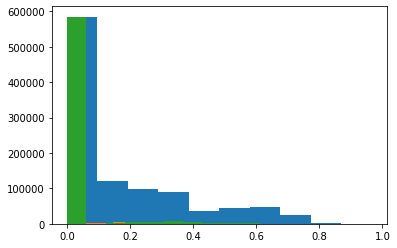

In [6]:
wifi_feature.hist([train_wifi_features, validate_wifi_features, test_wifi_features])

In [7]:
train_wifi_features.to_parquet('../data/train/features_wifi_names.parquet')
test_wifi_features.to_parquet('../data/test/features_wifi_names.parquet')
validate_wifi_features.to_parquet('../data/validate/features_wifi_names.parquet')

In [8]:
train_wifi_features.dtypes

wifi_0     float64
wifi_1     float64
wifi_2     float64
wifi_3     float64
wifi_4     float64
wifi_5     float64
wifi_6     float64
wifi_7     float64
wifi_8     float64
wifi_9     float64
wifi_10    float64
wifi_11    float64
wifi_12    float64
wifi_13    float64
wifi_14    float64
wifi_15    float64
wifi_16    float64
wifi_17    float64
wifi_18    float64
wifi_19    float64
wifi_20    float64
wifi_21    float64
wifi_22    float64
wifi_23    float64
wifi_24    float64
wifi_25    float64
wifi_26    float64
wifi_27    float64
wifi_28    float64
wifi_29    float64
dtype: object